In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [60]:
dem = pd.read_csv("dem_candidates.csv")
rep = pd.read_csv("rep_candidates.csv", encoding='latin-1')
state_pops = pd.read_excel("https://www2.census.gov/programs-surveys/popest/tables/2010-2019/state/totals/nst-est2019-01.xlsx")
state_pops = state_pops[8:59][['table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)', "Unnamed: 11"]]
state_names = state_pops['table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)'].to_numpy()
state_pops = state_pops["Unnamed: 11"].to_numpy()
pops_dict = {}
for i in range(len(state_names)):
    pops_dict[us_state_abbrev[state_names[i][1:]]] = state_pops[i]

In [61]:
district_lean = {}
districts = dem["District"].to_numpy()
leans = dem["Partisan Lean"].to_numpy()
for i in range(len(districts)):
    district_lean[districts[i]] = leans[i]

In [62]:
rep_districts = rep["District"].to_numpy()
rep_leans = []
for district in rep_districts:
    if district in district_lean.keys():
        rep_leans.append(district_lean[district])
    else:
        rep_leans.append("NaN")
rep["Partisan Lean"] = rep_leans

In [63]:
prominent_dem = (dem["Biden Endorsed?"] == "Yes") | (dem["Warren Endorsed? "] == "Yes") | (dem["Sanders Endorsed?"] == "Yes") | (dem["Emily Endorsed?"] == "Yes") | (dem["Our Revolution Endorsed?"] == "Yes") | (dem["Justice Dems Endorsed?"] == "Yes") | (dem["PCCC Endorsed?"] == "Yes") | (dem["Indivisible Endorsed?"] == "Yes") | (dem["WFP Endorsed?"] == "Yes") | (dem["VoteVets Endorsed?"])
prominent_endorsed_dem = dem[prominent_dem]
unendorsed_dem = dem[~prominent_dem]
num_endorsed_dem = len(prominent_endorsed_dem)

In [64]:
prominent_rep = (rep["Trump Endorsed?"] == "Yes") | (rep["Bannon Endorsed?"] == "Yes") | (rep["Great America Endorsed?"] == "Yes") | (rep["NRA Endorsed?"] == "Yes") | (rep["Right to Life Endorsed?"] == "Yes") | (rep["Susan B. Anthony Endorsed?"] == "Yes") | (rep["Club for Growth Endorsed?"] == "Yes") | (rep["Tea Party Endorsed?"] == "Yes") | (rep["Main Street Endorsed?"] == "Yes") | (rep["Chamber Endorsed?"] == "Yes")
prominent_endorsed_rep = rep[prominent_rep]
unendorsed_rep = rep[~prominent_rep]
num_endorsed_rep = len(prominent_endorsed_rep)

<BarContainer object of 2 artists>

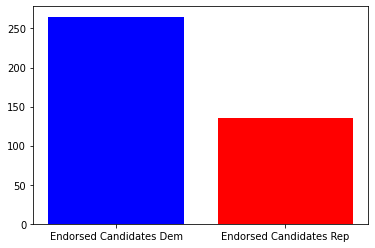

In [65]:
plt.bar(["Endorsed Candidates Dem", "Endorsed Candidates Rep"], [num_endorsed_dem, num_endorsed_rep], color=["blue", "red"])

<BarContainer object of 2 artists>

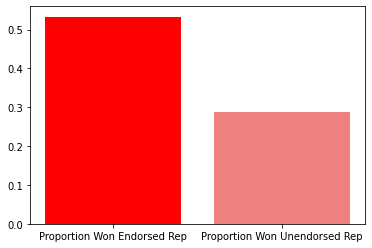

In [66]:
primary_result_endorsed_rep = prominent_endorsed_rep["Primary Status"]
primary_result_unendorsed_rep = unendorsed_rep["Primary Status"]
proportion_endorsed_rep = sum(primary_result_endorsed_rep == "Advanced") / len(primary_result_endorsed_rep)
proportion_unendorsed_rep = sum(primary_result_unendorsed_rep == "Advanced") / len(primary_result_unendorsed_rep)
diff_rep = proportion_endorsed_rep - proportion_unendorsed_rep
plt.bar(["Proportion Won Endorsed Rep", "Proportion Won Unendorsed Rep"], [proportion_endorsed_rep, proportion_unendorsed_rep], color=["red", "lightcoral"])

<BarContainer object of 2 artists>

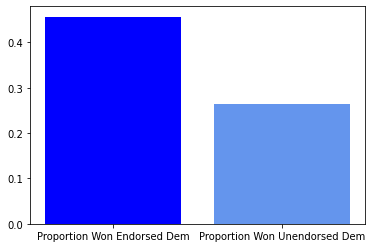

In [67]:
primary_result_endorsed_dem = prominent_endorsed_dem["Primary Status"]
primary_result_unendorsed_dem = unendorsed_dem["Primary Status"]
proportion_endorsed_dem = sum(primary_result_endorsed_dem == "Advanced") / len(primary_result_endorsed_dem)
proportion_unendorsed_dem = sum(primary_result_unendorsed_dem == "Advanced") / len(primary_result_unendorsed_dem)
diff_dem = proportion_endorsed_dem - proportion_unendorsed_dem
plt.bar(["Proportion Won Endorsed Dem", "Proportion Won Unendorsed Dem"], [proportion_endorsed_dem, proportion_unendorsed_dem], color=["blue", "cornflowerblue"])

<BarContainer object of 2 artists>

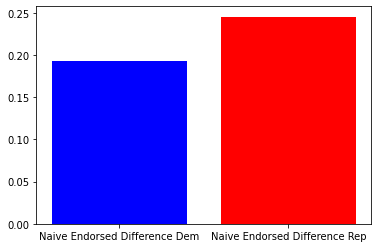

In [68]:
plt.bar(["Naive Endorsed Difference Dem", "Naive Endorsed Difference Rep"], [diff_dem, diff_rep], color=["blue", "red"])

<BarContainer object of 2 artists>

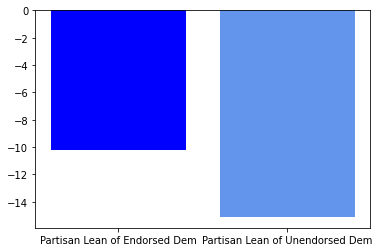

In [69]:
mean_dem1 = prominent_endorsed_dem["Partisan Lean"].mean()
mean_dem2 = unendorsed_dem["Partisan Lean"].mean()
plt.bar(["Partisan Lean of Endorsed Dem", "Partisan Lean of Unendorsed Dem"], [mean_dem1, mean_dem2], color=["blue", "cornflowerblue"])

<BarContainer object of 2 artists>

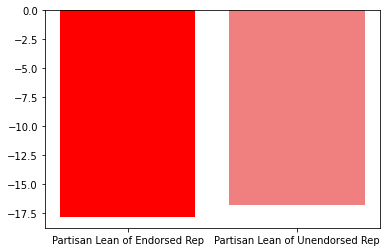

In [70]:
endorsed_rep_leans = prominent_endorsed_rep[prominent_endorsed_rep["Partisan Lean"] != "NaN"]
unendorsed_rep_leans = unendorsed_rep[unendorsed_rep["Partisan Lean"] != "NaN"]
mean_dem1 = endorsed_rep_leans["Partisan Lean"].mean()
mean_dem2 = unendorsed_rep_leans["Partisan Lean"].mean()
plt.bar(["Partisan Lean of Endorsed Rep", "Partisan Lean of Unendorsed Rep"], [mean_dem1, mean_dem2], color=["red", "lightcoral"])

In [92]:
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
state_rep = []
for val in prominent_endorsed_rep["District"]:
    for state in state_names:
        if state in val:
            state_rep.append(state)
            break
                        
for i in range(len(state_rep)):
    state_rep[i] = us_state_abbrev[state_rep[i]]
prominent_endorsed_rep["State"] = state_rep
state_count_rep = prominent_endorsed_rep[["State", "Candidate"]].groupby(["State"]).agg(['count']).reset_index()
new_df = pd.DataFrame()

new_df["State"] = state_count_rep.iloc[:, 0]
new_df["Count"] = state_count_rep.iloc[:, 1]
state_counts = dict(zip(new_df["State"], new_df["Count"]))
weighted_counts = []
for key in state_counts.keys():
    state_counts[key] = state_counts[key] / (pops_dict[key]) * 1000000

new_df = pd.DataFrame.from_dict(state_counts, orient="index").reset_index().rename(columns={"index": "State", 0 : "Endorsements per 1 Million"})


import plotly.express as px  # Be sure to import express
fig = px.choropleth(new_df,  # Input Pandas DataFrame
                    locations="State",  # DataFrame column with locations
                    color="Endorsements per 1 Million",  # DataFrame column with color values
                    hover_name="State", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Republican Endorsement Locations', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

<ipython-input-92-65b5e709f490>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
state_rep = []
for val in prominent_endorsed_dem["District"]:
    for state in state_names:
        if state in val:
            state_rep.append(state)
            break
                        
for i in range(len(state_rep)):
    state_rep[i] = us_state_abbrev[state_rep[i]]
prominent_endorsed_dem["State"] = state_rep
state_count_rep = prominent_endorsed_dem[["State", "Candidate"]].groupby(["State"]).agg(['count']).reset_index()
new_df = pd.DataFrame()
new_df["State"] = state_count_rep.iloc[:, 0]
new_df["Count"] = state_count_rep.iloc[:, 1]

state_counts = dict(zip(new_df["State"], new_df["Count"]))
weighted_counts = []
for key in state_counts.keys():
    state_counts[key] = state_counts[key] / (pops_dict[key]) * 1000000

new_df = pd.DataFrame.from_dict(state_counts, orient="index").reset_index().rename(columns={"index": "State", 0 : "Endorsements per 1 Million"})


import plotly.express as px  # Be sure to import express
fig = px.choropleth(new_df,  # Input Pandas DataFrame
                    locations="State",  # DataFrame column with locations
                    color="Endorsements per 1 Million",  # DataFrame column with color values
                    hover_name="State", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Democrat Endorsement Locations', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()

<ipython-input-93-d31574d45ebe>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

